In [1]:
import torch
import torch.nn as nn
import numpy as np
from tqdm import tqdm
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
import argparse
import time

from unet import UNet
from hednet import HedNet
from utils.dataset_aug import OfdaDataset

from training_functions import get_device

import matplotlib.pyplot as plt

from trainer_ofda import Trainer

In [2]:
def show(img, denorm=False):
    #npimg = img.numpy()
    #plt.figure(figsize=(60,10))
    #plt.imsave('tmp-test-tfs-'+name+'.png', np.transpose(npimg, (1,2,0)))
    #plt.imsave('tmp-test-tfs-'+name+'.png', img.permute(1,2,0), cmap='gray')
    #plt.imshow(np.transpose(npimg, (1, 2, 0)), interpolation='nearest')
    #plt.imshow(img.permute(1,2,0), cmap='gray')
    
    inp = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.726, 0.726, 0.726])
    std = np.array([0.201, 0.201, 0.201])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    
    if denorm:
        plt.imshow(inp)
    else:
        plt.imshow(img.permute(1,2,0))
    
    plt.show()

total dataset items: 17


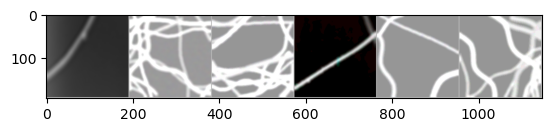

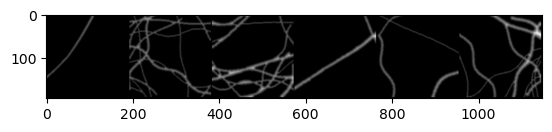

In [7]:
net = UNet(n_channels=3, n_classes=1, bilinear=False, n_features=32)

device = get_device()
net.to(device=device)

trainer = Trainer(net, device)

print('total dataset items:', len(trainer.val))

imgs = [trainer.val[i] for i in range(6)]

show(torchvision.utils.make_grid(torch.stack([img['image'] for img in imgs])), denorm=True)
show(torchvision.utils.make_grid(torch.stack([img['mask'] for img in imgs]),normalize=True))

#plt.imshow(imgs[5]['mask'].permute(1,2,0), cmap='gray')
#plt.show()

total dataset items: 86


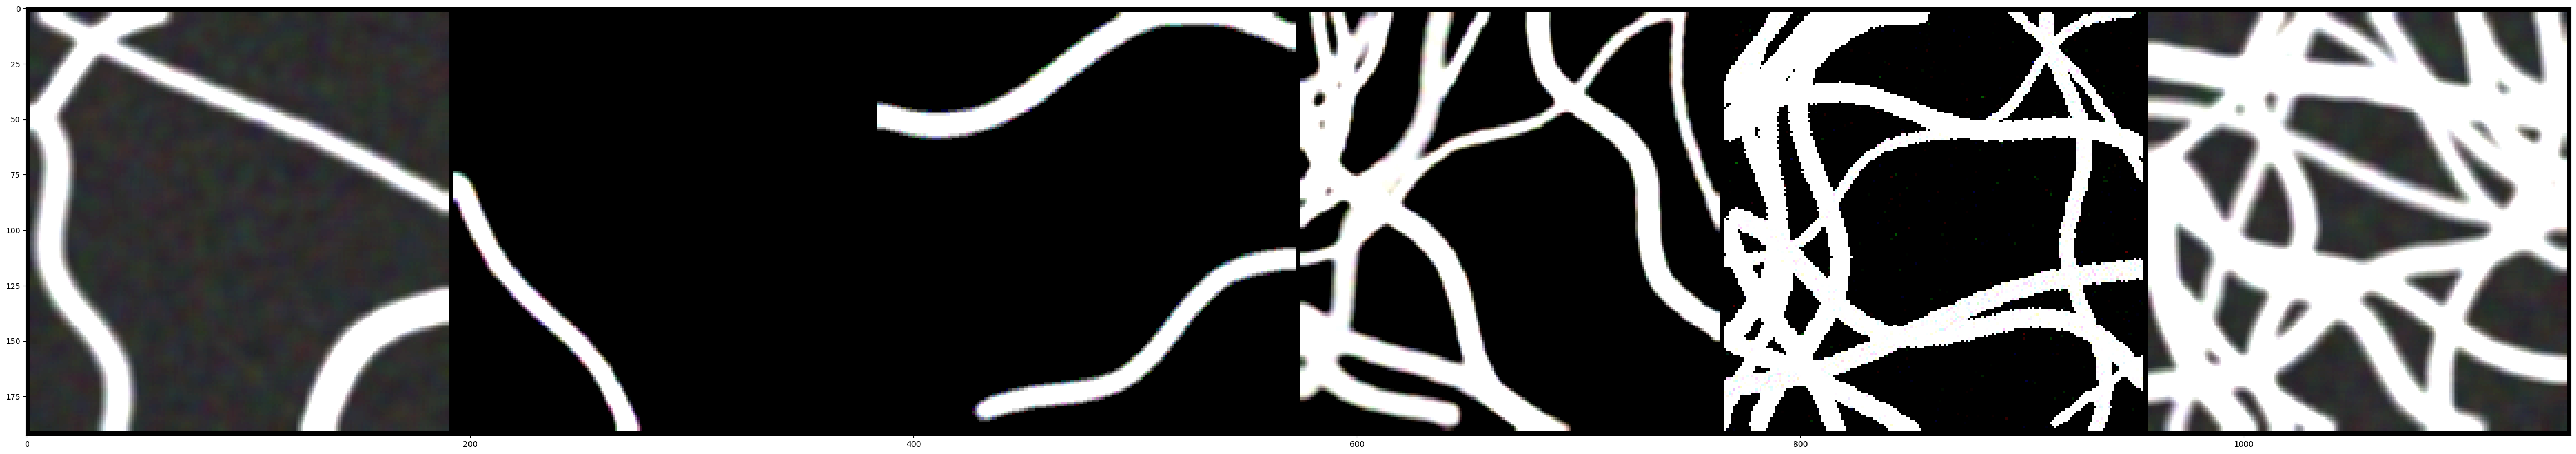

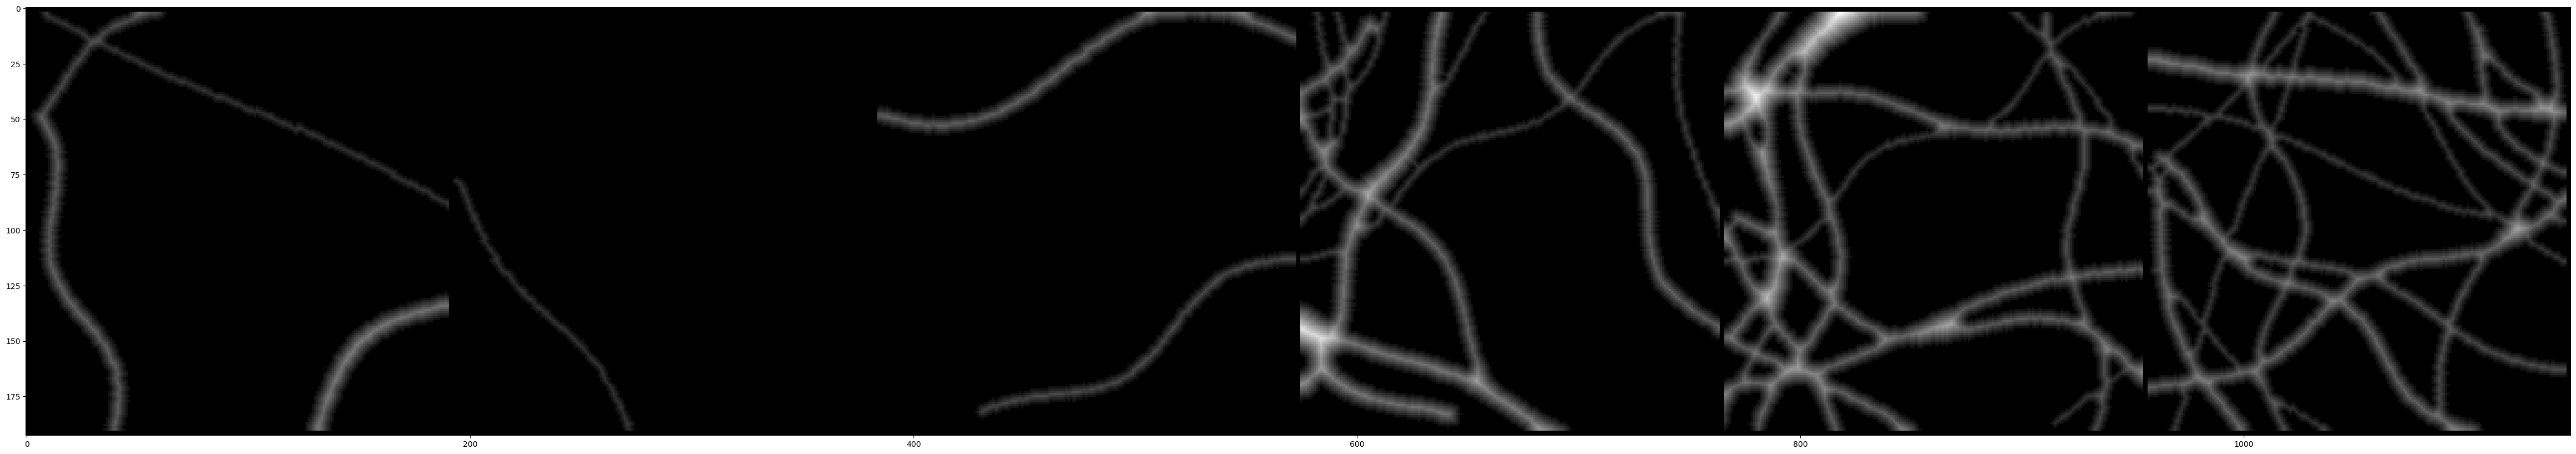

In [5]:
net = UNet(n_channels=3, n_classes=1, bilinear=False, n_features=32)

device = get_device()
net.to(device=device)

trainer = Trainer(net, device)

print('total dataset items:', len(trainer.fused_dataset))

imgs = [trainer.fused_dataset[i] for i in range(6)]

show(torchvision.utils.make_grid(torch.stack([img['image'] for img in imgs])))
show(torchvision.utils.make_grid(torch.stack([img['mask'] for img in imgs]),normalize=True))

In [5]:
print(imgs[0]['mask'].shape)

torch.Size([1, 189, 189])


In [7]:
print(imgs[0]['mask'].min())

tensor(0.)


In [8]:
import math

print(math.factorial(3))

6


In [6]:
print(120*43)

5160


In [13]:
print(86*(2**5)*(86//4))

57792


In [16]:
print(86*(2**8))

22016


In [17]:
ar = np.array([1,2,3])

In [18]:
t = torch.from_numpy(ar).type(torch.FloatTensor)

In [19]:
print(t)

tensor([1., 2., 3.])


total dataset items: 11


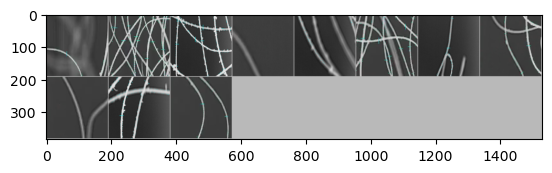

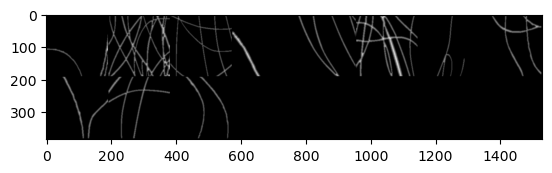

In [8]:
net = UNet(n_channels=3, n_classes=1, bilinear=False, n_features=32)

device = get_device()
net.to(device=device)

trainer = Trainer(net, device, test_ofda_subset=True)

len_test = len(trainer.test_dataset);
print('total dataset items:', len_test)

imgs = [trainer.test_dataset[i] for i in range(len_test)]

show(torchvision.utils.make_grid(torch.stack([img['image'] for img in imgs])), denorm=True)
show(torchvision.utils.make_grid(torch.stack([img['mask'] for img in imgs]),normalize=True))

In [20]:
imgs[2]['path']

'/home/aalejo/proyectos/dmnet/datasets/ofda/test2/samples/g2_0231.png'

In [36]:
imgs[2]['mask'].unique()

tensor([0.0000, 0.9550, 1.3693, 1.9100, 2.3243, 2.7386, 2.8650, 3.2793, 3.6936,
        3.8200, 4.1079, 4.2343, 4.6486, 4.7750])

In [23]:
imgs[2]['image'].min()

tensor(-3.6119)

In [24]:
imgs[2]['image'].max()

tensor(1.3632)

In [31]:
inp = imgs[2]['image'].numpy().transpose((1, 2, 0))
mean = np.array([0.726, 0.726, 0.726])
std = np.array([0.201, 0.201, 0.201])
inp = std * inp + mean

In [32]:
inp.max()

0.999999979019165

In [33]:
inp.min()

3.075599663837636e-08